In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as ks

#unsupervised:
from sklearn.cluster import KMeans
#transformers:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Note: train data has 13 feature column and 1 binary label for a total of 14 columns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(4)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0


In [4]:
train.shape

(165034, 14)

(array([8.9675e+04, 1.7800e+02, 2.5180e+03, 1.1880e+04, 2.7820e+04,
        2.4228e+04, 7.5040e+03, 1.1110e+03, 1.0900e+02, 1.1000e+01]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

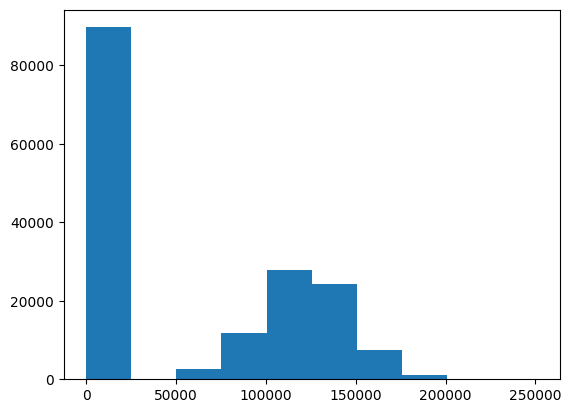

In [5]:
plt.hist(train.Balance)

In [21]:
#make classification:
def balanceDivider(x):
    code = 0
    if x < 50000:
        code = 0
    else:
        code = 1
    # if x >= 50000:
    #     code = 1
    # if x > 75000:
    #     code = 2
    # if x > 100000:
    #     code = 3
    # if x > 125000:
    #     code = 4
    # if x > 150000:
    #     code = 5
    # if x > 200000:
    #     code = 6
    return code
    
has_balance = train.Balance.apply(lambda t: balanceDivider(t))

In [22]:
z = pd.merge(has_balance, train.Exited, left_index = True, right_index = True)
contingency = pd.crosstab(z.Balance, train.Exited)
contingency

Exited,0,1
Balance,,
0,75300,14553
1,54813,20368


In [23]:
result = st.chi2_contingency(contingency)
print("Test statistic : {}, p_value : {}".format(result.statistic, result.pvalue))

Test statistic : 2912.0811041133, p_value : 0.0


In [24]:
result.expected_freq

array([[70840.21104136, 19012.78895864],
       [59272.78895864, 15908.21104136]])